In [ ]:
duom <- read.csv("Paskolų duomenys.csv", header=TRUE)
str(duom)

'data.frame':	10893 obs. of  36 variables:
 $ Loan_status                         : chr  "FULLY_PAID" "FULLY_PAID" "FULLY_PAID" "FULLY_PAID" ...
 $ Loan_Amount                         : num  1000 14000 8800 2000 1500 5600 4700 5000 4400 10100 ...
 $ Type                                : chr  "Vartojimo" "Vartojimo" "Vartojimo" "Vartojimo" ...
 $ Original_investment                 : num  100 20 25 20 60 10 100 20 5 5 ...
 $ Original_Investment_Date            : chr  "5/29/2023" "4/11/2019" "3/16/2020" "8/4/2017" ...
 $ Loan_Interest                       : int  20 14 16 22 15 14 15 22 24 11 ...
 $ Loan_Duration                       : int  48 72 72 12 12 72 24 52 51 72 ...
 $ Credit_Rating                       : chr  "B2" "C1" "B1" "B3" ...
 $ Probability_of_Default              : num  0.015 0.0713 0.0173 0.0354 0.036 ...
 $ Age                                 : int  63 34 55 31 45 36 36 22 32 33 ...
 $ Gender                              : chr  "F" "M" "F" "M" ...
 $ Main_Source_of_I

In [ ]:
for (col in names(duom)) {
  if (is.character(duom[[col]])) {
    duom[[col]] <- as.factor(duom[[col]])
  }
}

str(duom)

'data.frame':	10893 obs. of  36 variables:
 $ Loan_status                         : Factor w/ 2 levels "DEFAULT","FULLY_PAID": 2 2 2 2 2 2 2 2 2 2 ...
 $ Loan_Amount                         : num  1000 14000 8800 2000 1500 5600 4700 5000 4400 10100 ...
 $ Type                                : Factor w/ 1 level "Vartojimo": 1 1 1 1 1 1 1 1 1 1 ...
 $ Original_investment                 : num  100 20 25 20 60 10 100 20 5 5 ...
 $ Original_Investment_Date            : Factor w/ 2889 levels "1/1/2021","1/1/2022",..: 1857 1472 1261 2610 2362 962 1927 1677 1173 2189 ...
 $ Loan_Interest                       : int  20 14 16 22 15 14 15 22 24 11 ...
 $ Loan_Duration                       : int  48 72 72 12 12 72 24 52 51 72 ...
 $ Credit_Rating                       : Factor w/ 16 levels "A1","A2","A3",..: 5 7 4 6 6 2 6 9 8 6 ...
 $ Probability_of_Default              : num  0.015 0.0713 0.0173 0.0354 0.036 ...
 $ Age                                 : int  63 34 55 31 45 36 36 22 32 33 ...
 $

In [ ]:
model_w_pod  <- lm(Loan_Interest ~ Probability_of_Default + Loan_Amount + Loan_Duration + Individual_monthly_income + Credit_Rating + Monthly_expenditure + Unpaid_Interest + Left_Payments, data=duom)
model_wo_pod <- lm(Loan_Interest ~ Loan_Amount + Loan_Duration + Individual_monthly_income + Credit_Rating + Monthly_expenditure + Unpaid_Interest + Left_Payments, data=duom)

In [ ]:
summary(model_w_pod)


Call:
lm(formula = Loan_Interest ~ Probability_of_Default + Loan_Amount + 
    Loan_Duration + Individual_monthly_income + Credit_Rating + 
    Monthly_expenditure + Unpaid_Interest + Left_Payments, data = duom)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6718  -1.8993  -0.2357   1.6228  22.1448 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               25.1106374  2.5360169   9.902  < 2e-16 ***
Probability_of_Default    34.6537396  3.1566074  10.978  < 2e-16 ***
Loan_Amount               -0.0008429  0.0000710 -11.872  < 2e-16 ***
Loan_Duration             -0.0034075  0.0146782  -0.232 0.816483    
Individual_monthly_income  0.0002805  0.0002333   1.203 0.229479    
Credit_RatingA2           -3.0083727  2.8246610  -1.065 0.287165    
Credit_RatingA3           -3.4819816  2.5673344  -1.356 0.175381    
Credit_RatingB1           -1.2736565  2.5090632  -0.508 0.611852    
Credit_RatingB2           -0.7681303  2.4905667

In [ ]:
summary(model_wo_pod)


Call:
lm(formula = Loan_Interest ~ Loan_Amount + Loan_Duration + Individual_monthly_income + 
    Credit_Rating + Monthly_expenditure + Unpaid_Interest + Left_Payments, 
    data = duom)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.948  -1.951  -0.008   1.831  21.767 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.462e+01  2.710e+00   9.084  < 2e-16 ***
Loan_Amount               -8.719e-04  7.583e-05 -11.497  < 2e-16 ***
Loan_Duration              1.197e-02  1.562e-02   0.766  0.44370    
Individual_monthly_income  5.591e-04  2.478e-04   2.256  0.02435 *  
Credit_RatingA2           -2.587e+00  3.019e+00  -0.857  0.39169    
Credit_RatingA3           -3.031e+00  2.744e+00  -1.105  0.26960    
Credit_RatingB1           -6.270e-01  2.681e+00  -0.234  0.81515    
Credit_RatingB2            3.295e-01  2.660e+00   0.124  0.90145    
Credit_RatingB3            1.233e+00  2.654e+00   0.465  0.64236    
Credit_Rating

In [ ]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



In [ ]:
vif(model_w_pod)

,GVIF,Df,GVIF^(1/(2*Df))
Probability_of_Default,2.353928,1,1.534252
Loan_Amount,7.879077,1,2.806969
Loan_Duration,6.702950,1,2.589006
Individual_monthly_income,2.915337,1,1.707436
Credit_Rating,3.623078,15,1.043845
Monthly_expenditure,2.138607,1,1.462398
Unpaid_Interest,9.542097,1,3.089028
Left_Payments,8.480869,1,2.912193


In [ ]:
vif(model_wo_pod)

,GVIF,Df,GVIF^(1/(2*Df))
Loan_Amount,7.868185,1,2.805029
Loan_Duration,6.641925,1,2.577193
Individual_monthly_income,2.880844,1,1.697305
Credit_Rating,1.896029,15,1.021554
Monthly_expenditure,2.135915,1,1.461477
Unpaid_Interest,9.536701,1,3.088155
Left_Payments,8.390443,1,2.896626


In [ ]:
install.packages("lmtest")
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
bptest(model_w_pod)
bptest(model_wo_pod)


	studentized Breusch-Pagan test

data:  model_w_pod
BP = 218.55, df = 22, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  model_wo_pod
BP = 288.05, df = 21, p-value < 2.2e-16


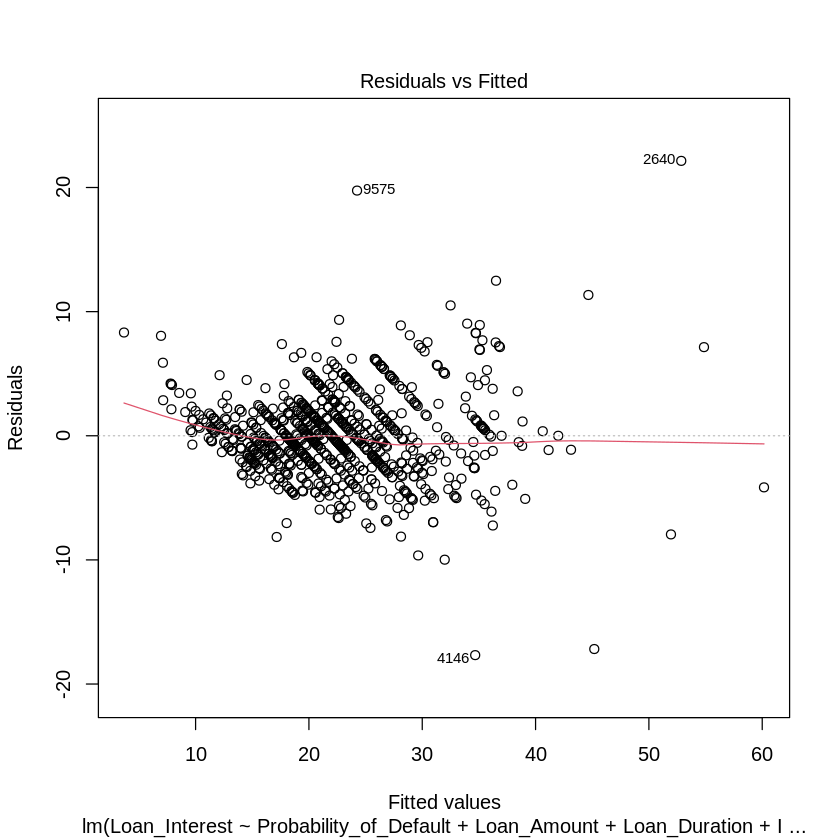

In [ ]:
plot(model_w_pod, 1)

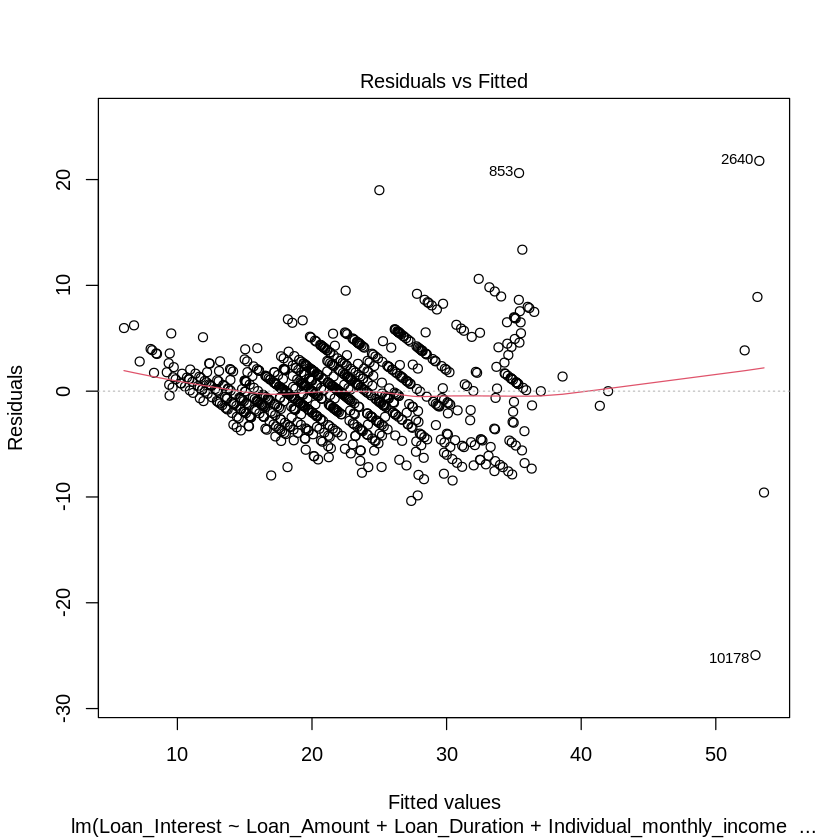

In [ ]:
plot(model_wo_pod, 1)

Warning message:
“not plotting observations with leverage one:
  83, 590”


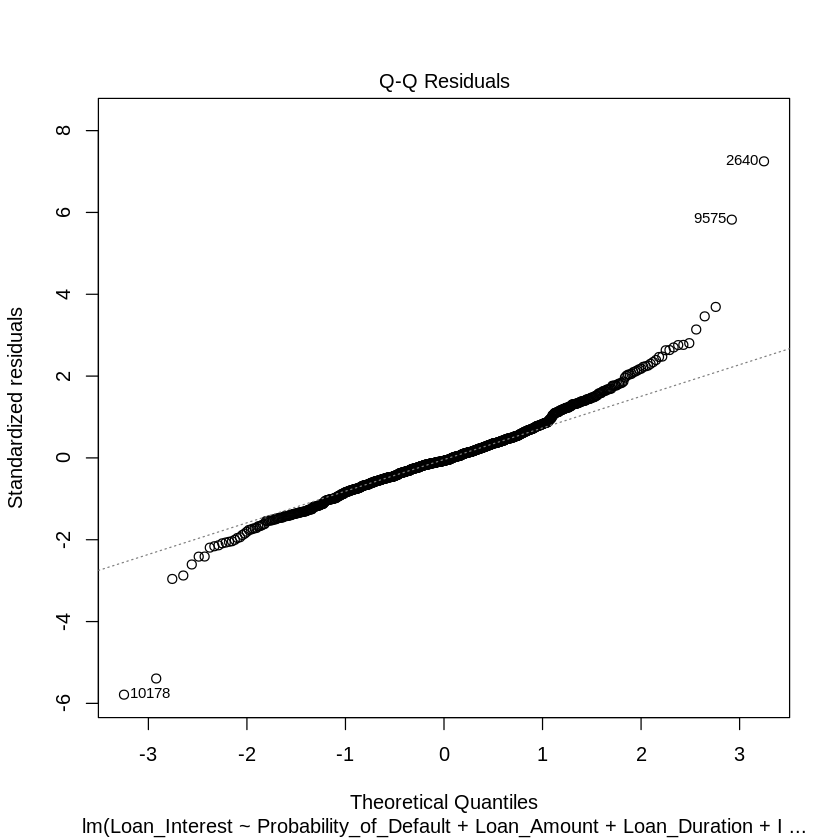

In [ ]:
plot(model_w_pod, 2)

Warning message:
“not plotting observations with leverage one:
  83, 590”


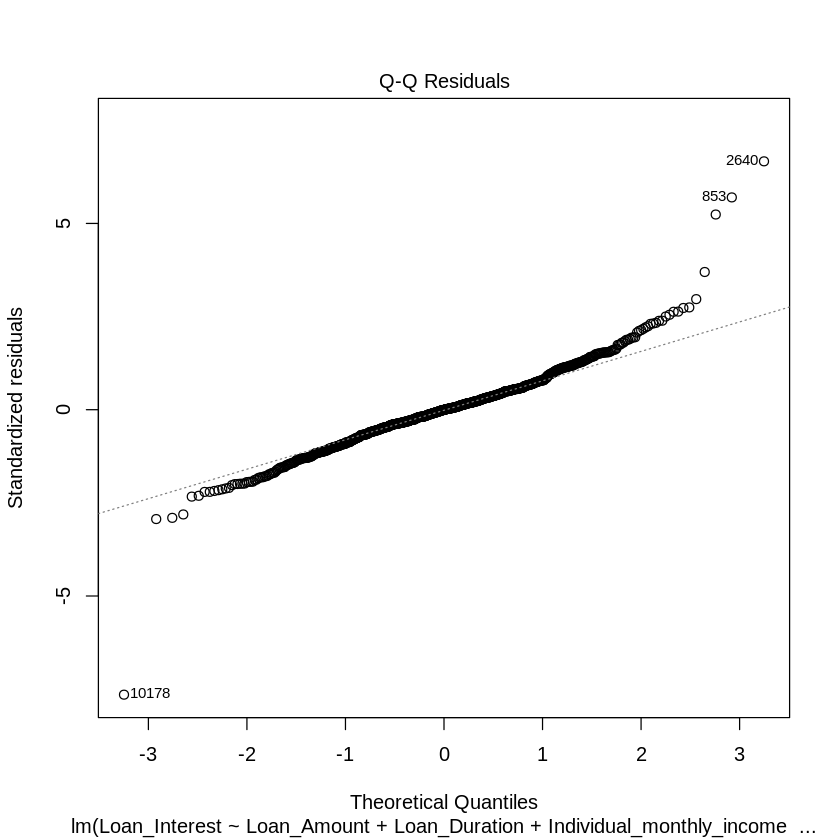

In [ ]:
plot(model_wo_pod, 2)

In [ ]:
shapiro.test(residuals(model_w_pod))
shapiro.test(residuals(model_wo_pod))


	Shapiro-Wilk normality test

data:  residuals(model_w_pod)
W = 0.95187, p-value = 3.674e-16



	Shapiro-Wilk normality test

data:  residuals(model_wo_pod)
W = 0.9474, p-value < 2.2e-16
